
🔍 Hyperparameter Tuning for Logistic Regression ...
✅ Best Parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 200}
📊 Accuracy: 0.8804
🎯 Precision: 0.8636
🔄 Recall: 0.9314
📈 F1 Score: 0.8962


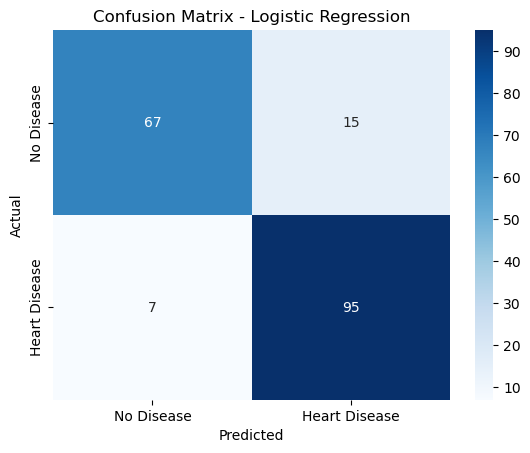

💾 Model saved as logistic_regression_model.pkl

🔍 Hyperparameter Tuning for Random Forest ...
✅ Best Parameters: {'class_weight': None, 'max_depth': 10, 'n_estimators': 500}
📊 Accuracy: 0.8913
🎯 Precision: 0.8868
🔄 Recall: 0.9216
📈 F1 Score: 0.9038


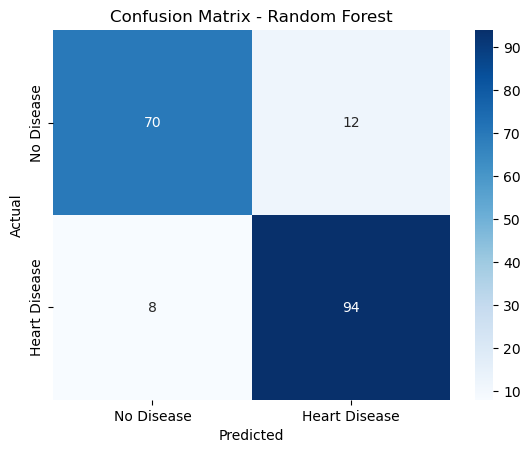

💾 Model saved as random_forest_model.pkl

🔍 Hyperparameter Tuning for Gradient Boosting ...
✅ Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
📊 Accuracy: 0.8804
🎯 Precision: 0.8922
🔄 Recall: 0.8922
📈 F1 Score: 0.8922


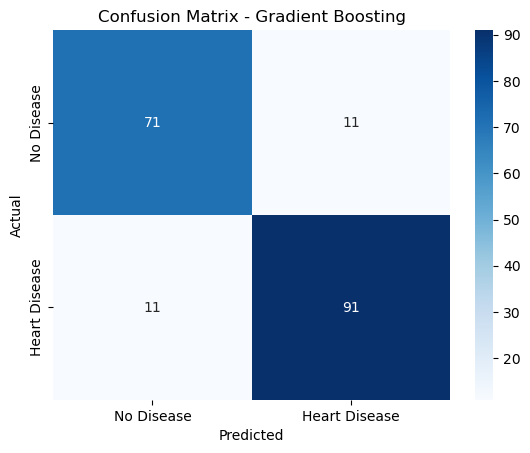

💾 Model saved as gradient_boosting_model.pkl

🔍 Hyperparameter Tuning for Support Vector Machine ...
✅ Best Parameters: {'C': 1, 'class_weight': None, 'kernel': 'rbf'}
📊 Accuracy: 0.8859
🎯 Precision: 0.8649
🔄 Recall: 0.9412
📈 F1 Score: 0.9014


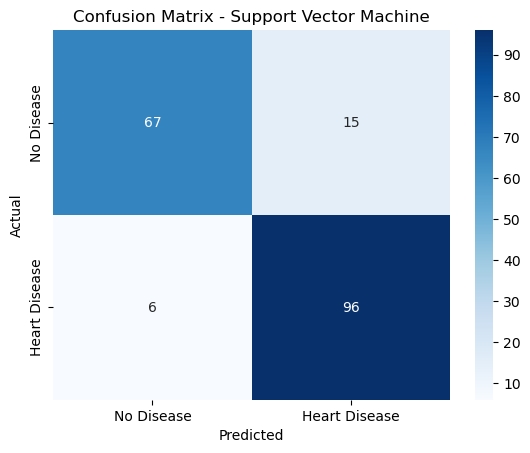

💾 Model saved as support_vector_machine_model.pkl

🔍 Hyperparameter Tuning for K-Nearest Neighbors ...
✅ Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}
📊 Accuracy: 0.8750
🎯 Precision: 0.8835
🔄 Recall: 0.8922
📈 F1 Score: 0.8878


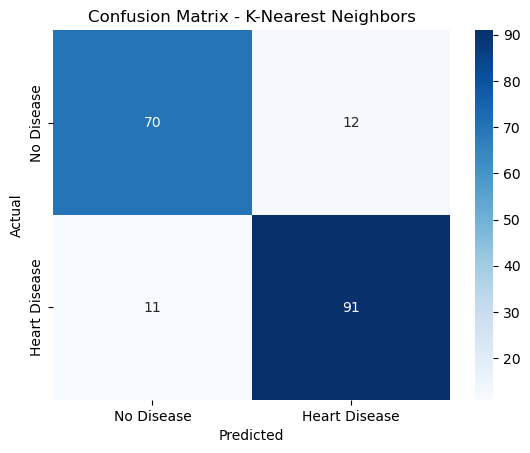

💾 Model saved as k-nearest_neighbors_model.pkl

🔍 Hyperparameter Tuning for Decision Tree ...
✅ Best Parameters: {'criterion': 'entropy', 'max_depth': 5}
📊 Accuracy: 0.8261
🎯 Precision: 0.8571
🔄 Recall: 0.8235
📈 F1 Score: 0.8400


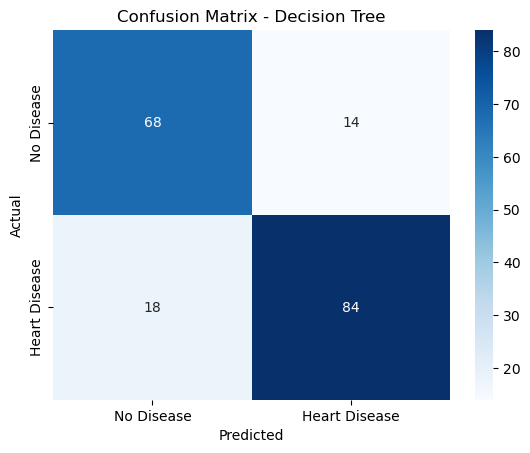

💾 Model saved as decision_tree_model.pkl

🔍 Hyperparameter Tuning for Naive Bayes ...
📊 Accuracy: 0.8913
🎯 Precision: 0.8942
🔄 Recall: 0.9118
📈 F1 Score: 0.9029


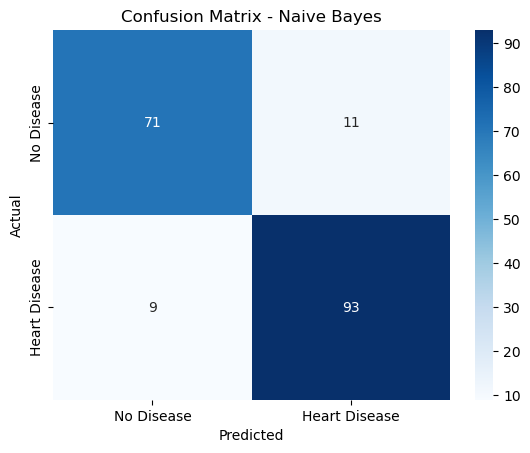

💾 Model saved as naive_bayes_model.pkl
💾 Scaler saved as scaler.pkl


In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

warnings.filterwarnings('ignore')

# Load dataset
data = pd.read_csv('heart.csv')  # Ensure you have the correct dataset file

# Define features (X) and target variable (y)
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

# Perform label encoding for categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le  # Save encoders if needed later

# Split dataset using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'max_iter': [200, 500, 1000],
        'class_weight': ['balanced', None]
    },
    "Random Forest": {
        'n_estimators': [100, 300, 500],
        'max_depth': [10, 15, 20],
        'class_weight': ['balanced', None]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [5, 7, 10]
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'class_weight': ['balanced', None]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    "Decision Tree": {
        'max_depth': [5, 10, 15],
        'criterion': ['gini', 'entropy']
    }
}

# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()  # No hyperparameters for Naive Bayes
}

# Train, tune, and evaluate models
best_models = {}
for name, model in models.items():
    print(f"\n🔍 Hyperparameter Tuning for {name} ...")
    
    # If the model has hyperparameters to tune
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"✅ Best Parameters: {grid_search.best_params_}")
    else:
        # Directly train Naive Bayes
        best_model = model.fit(X_train, y_train)

    best_models[name] = best_model
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"📊 Accuracy: {accuracy:.4f}")
    print(f"🎯 Precision: {precision:.4f}")
    print(f"🔄 Recall: {recall:.4f}")
    print(f"📈 F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Heart Disease'], yticklabels=['No Disease', 'Heart Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Save the trained model
    filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(best_model, file)
    print(f"💾 Model saved as {filename}")

# Save the scaler as well
with open("scaler.pkl", 'wb') as file:
    pickle.dump(scaler, file)
print("💾 Scaler saved as scaler.pkl")
